In [37]:
import os
import json
from fabrictestbed.slice_manager import SliceManager, Status

In [38]:
credmgr_host = os.environ['FABRIC_CREDMGR_HOST']
orchestrator_host = os.environ['FABRIC_ORCHESTRATOR_HOST']
print(f"CM Host: {credmgr_host} Orchestrator Host: {orchestrator_host}")

CM Host: beta-2.fabric-testbed.net Orchestrator Host: beta-7.fabric-testbed.net


In [39]:
# create and initialize the slice manager

slice_manager = SliceManager(oc_host = orchestrator_host, cm_host = credmgr_host, project_name = 'all', scope = 'all')
slice_manager.initialize()

try:
    id_token, refresh_token = slice_manager.refresh_tokens()
except Exception as e:
    print("Exception occurred while getting tokens:{}".format(e))

fabric_refresh_token=slice_manager.get_refresh_token()
print()
print("New Refresh Token: {}".format(fabric_refresh_token))
print()
print("Stored new Refresh Token")
%store fabric_refresh_token


New Refresh Token: NB2HI4DTHIXS6Y3JNRXWO33OFZXXEZZPN5QXK5DIGIXTONDGMFQWIM3GMZRTKNRSMY3DQY3BG42TMNTDMVRDAY3EMJSGCOJ7OR4XAZJ5OJSWM4TFONUFI33LMVXCM5DTHUYTMMRYG44DGMJVG44TOOBGOZSXE43JN5XD25RSFYYCM3DJMZSXI2LNMU6TQNRUGAYDAMBQ

Stored new Refresh Token
Stored 'fabric_refresh_token' (str)


In [40]:
status, advertised_topology = slice_manager.resources()

print(f"Status: {status}")
if status == Status.OK:
    print(f"Topology: {advertised_topology}")
else:
    print(f"Error: {advertised_topology}")

Status: Status.OK
Topology: UKY: { cpu: 6/6 , core: 173/192 , ram: 1,478/1,536 G, disk: 9,410/9,600 G, unit: 3/3 }
	Components:
		NVME-P4510:  NVME P4510 { disk: 9,000/10,000 G, unit: 9/10 }
		SharedNIC-ConnectX-6:  SharedNIC ConnectX-6 { unit: 381/381 }
		SmartNIC-ConnectX-6:  SmartNIC ConnectX-6 { unit: 2/2 }
		SmartNIC-ConnectX-5:  SmartNIC ConnectX-5 { unit: 2/2 }
		GPU-RTX6000:  GPU RTX6000 { unit: 2/2 }
		GPU-Tesla T4:  GPU Tesla T4 { unit: 4/4 }
	Site Interfaces:
		UKY_LBNL: TrunkPort { bw: 100/100 Gbps}
RENC
	Components:
	Site Interfaces:
STAR
	Components:
	Site Interfaces:
LBNL: { cpu: 6/6 , core: 170/192 , ram: 1,446/1,536 G, disk: 9,230/9,600 G, unit: 3/3 }
	Components:
		SharedNIC-ConnectX-6:  SharedNIC ConnectX-6 { unit: 379/381 }
		NVME-P4510:  NVME P4510 { disk: 9,000/10,000 G, unit: 9/10 }
		GPU-RTX6000:  GPU RTX6000 { unit: 2/2 }
		GPU-Tesla T4:  GPU Tesla T4 { unit: 4/4 }
		SmartNIC-ConnectX-6:  SmartNIC ConnectX-6 { unit: 0/2 }
		SmartNIC-ConnectX-5:  SmartNIC Connec

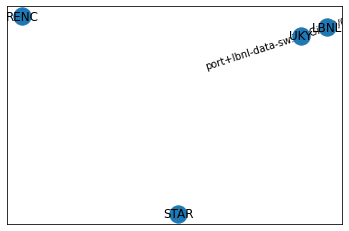

In [41]:
if status == Status.OK:
    advertised_topology.draw()

In [42]:
from fabrictestbed.slice_editor import ExperimentTopology, Capacities, ComponentType, ComponentModelType, ServiceType

Experiment = ExperimentTopology()

# Add node
S1Node1 = Experiment.add_node(name='S1Node1', site='LBNL')
S1Node2 = Experiment.add_node(name='S1Node2', site = 'LBNL')
S1Node3 = Experiment.add_node(name='S1Node3', site = 'LBNL')
S1Node4 = Experiment.add_node(name='S1Node4', site = 'UKY')

# Set capacities
cap = Capacities()
cap.set_fields(core=2, ram=16, disk=100)

# Set Properties
S1Node1.set_properties(capacities=cap, image_type='qcow2', image_ref='default_centos_8')
S1Node2.set_properties(capacities=cap, image_type='qcow2', image_ref='default_centos_8')
S1Node3.set_properties(capacities=cap, image_type='qcow2', image_ref='default_centos_8')
S1Node4.set_properties(capacities=cap, image_type='qcow2', image_ref='default_centos_8')

# Generate Slice Graph
slice_graph = Experiment.serialize()

ssh_key = None
with open ("/home/fabric/.ssh/id_rsa.pub", "r") as myfile:
    ssh_key=myfile.read()
    ssh_key=ssh_key.strip()

# Request slice from Orchestrator
status, reservations = slice_manager.create(slice_name='Slice 1', slice_graph=slice_graph, ssh_key=ssh_key)

print("Response Status {}".format(status))
if status == Status.OK:
    print("Reservations created {}".format(reservations))
else:
    print(f"Failure: {reservations}")
    
# NEXT RESOURCE ---------------------------------------------------------------------

Experiment = ExperimentTopology()

# Add node
S2Node1 = Experiment.add_node(name='S2Node1', site='LBNL')
S2Node2 = Experiment.add_node(name='S2Node2', site = 'LBNL')
S2Node3 = Experiment.add_node(name='S2Node3', site = 'UKY')
S2Node4 = Experiment.add_node(name='S2Node4', site = 'UKY')

# Set capacities
cap = Capacities()
cap.set_fields(core=3, ram=6, disk=10)

# Set Properties
S2Node1.set_properties(capacities=cap, image_type='qcow2', image_ref='default_centos_8')
S2Node2.set_properties(capacities=cap, image_type='qcow2', image_ref='default_centos_8')
S2Node3.set_properties(capacities=cap, image_type='qcow2', image_ref='default_centos_8')
S2Node4.set_properties(capacities=cap, image_type='qcow2', image_ref='default_centos_8')

# Generate Slice Graph
slice_graph = Experiment.serialize()

ssh_key = None
with open ("/home/fabric/.ssh/id_rsa.pub", "r") as myfile:
    ssh_key=myfile.read()
    ssh_key=ssh_key.strip()

# Request slice from Orchestrator
status, reservations = slice_manager.create(slice_name='Slice 2', slice_graph=slice_graph, ssh_key=ssh_key)

print("Response Status {}".format(status))
if status == Status.OK:
    print("Reservations created {}".format(reservations))
else:
    print(f"Failure: {reservations}")
    
# NEXT RESOURCE ---------------------------------------------------------------------

Experiment = ExperimentTopology()

# Add node
S3Node1 = Experiment.add_node(name='S3Node1', site='UKY')
S3Node2 = Experiment.add_node(name='S3Node2', site = 'UKY')
S3Node3 = Experiment.add_node(name='S3Node3', site = 'UKY')

# Set capacities
cap = Capacities()
cap.set_fields(core=3, ram=8, disk=20)

# Set Properties
S3Node1.set_properties(capacities=cap, image_type='qcow2', image_ref='default_centos_8')
S3Node2.set_properties(capacities=cap, image_type='qcow2', image_ref='default_centos_8')
S3Node3.set_properties(capacities=cap, image_type='qcow2', image_ref='default_centos_8')

# Generate Slice Graph
slice_graph = Experiment.serialize()

ssh_key = None
with open ("/home/fabric/.ssh/id_rsa.pub", "r") as myfile:
    ssh_key=myfile.read()
    ssh_key=ssh_key.strip()

# Request slice from Orchestrator
status, reservations = slice_manager.create(slice_name='Slice 3', slice_graph=slice_graph, ssh_key=ssh_key)

print("Response Status {}".format(status))
if status == Status.OK:
    print("Reservations created {}".format(reservations))
else:
    print(f"Failure: {reservations}")
    
# NEXT RESOURCE ---------------------------------------------------------------------
    
Experiment = ExperimentTopology()

# Add node
S4Node1 = Experiment.add_node(name='S4Node1', site='LBNL')
S4Node2 = Experiment.add_node(name='S4Node2', site='LBNL')

# Set capacities
cap = Capacities()
cap.set_fields(core=2, ram=6, disk=10)

# Set Properties
S4Node1.set_properties(capacities=cap, image_type='qcow2', image_ref='default_centos_8')
S4Node2.set_properties(capacities=cap, image_type='qcow2', image_ref='default_centos_8')

# Shared Cards
S4Node1.add_component(model_type=ComponentModelType.SharedNIC_ConnectX_6, name='S4Node1-nic1')
S4Node2.add_component(model_type=ComponentModelType.SharedNIC_ConnectX_6, name='S4Node2-nic1')

# L2Bridge Service
Experiment.add_network_service(name='bridge1', nstype=ServiceType.L2Bridge, interfaces=Experiment.interface_list)

# Generate Slice Graph
slice_graph = Experiment.serialize()

ssh_key = None
with open ("/home/fabric/.ssh/id_rsa.pub", "r") as myfile:
    ssh_key=myfile.read()
    ssh_key=ssh_key.strip()

# Request slice from Orchestrator
status, reservations = slice_manager.create(slice_name='Slice 4 (l2bridge-sriov)', slice_graph=slice_graph, ssh_key=ssh_key)

print("Response Status {}".format(status))
if status == Status.OK:
    print("Reservations created {}".format(reservations))
else:
    print(f"Failure: {reservations}")

Response Status Status.FAILURE
Failure: (500)
Reason: INTERNAL SERVER ERROR
HTTP response headers: HTTPHeaderDict({'Server': 'nginx/1.19.8', 'Date': 'Thu, 12 Aug 2021 15:46:02 GMT', 'Content-Type': 'text/html; charset=utf-8', 'Content-Length': '28', 'Connection': 'keep-alive', 'Access-Control-Allow-Credentials': 'true', 'Access-Control-Allow-Headers': 'DNT, User-Agent, X-Requested-With, If-Modified-Since, Cache-Control, Content-Type, Range', 'Access-Control-Allow-Methods': 'GET, POST, PUT, DELETE, OPTIONS', 'Access-Control-Allow-Origin': '*', 'Access-Control-Expose-Headers': 'Content-Length, Content-Range, X-Error', 'X-Error': 'Slice Slice 1 already exists'})
HTTP response body: Slice Slice 1 already exists

Response Status Status.FAILURE
Failure: (500)
Reason: INTERNAL SERVER ERROR
HTTP response headers: HTTPHeaderDict({'Server': 'nginx/1.19.8', 'Date': 'Thu, 12 Aug 2021 15:46:02 GMT', 'Content-Type': 'text/html; charset=utf-8', 'Content-Length': '28', 'Connection': 'keep-alive', 'Acc

In [69]:
status, slices = slice_manager.slices()
wanted = ['Slice 1', 'Slice 2', 'Slice 3', "Slice 4 (l2bridge-sriov)"]
for want in wanted:
    print(f'{want}: {want in [slice.slice_name for slice in slices]}')

Slice 1: True
Slice 2: True
Slice 3: True
Slice 4 (l2bridge-sriov): True


In [34]:
# ids = [slice.slice_id for slice in slices]
# for id in ids:
#     status, result = slice_manager.delete(slice_id=id)